In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#The first exploration of the data by loading and inspecting its structure
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

print("Orders data:")
print(orders.head(10))
print("\nVisitors data:")
print(visitors.head(10))

Orders data:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-15    13710     A
9     1506739906  1882260405  2019-08-15     1855     B

Visitors data:
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
5  2019-08-06     A       667
6  2019-08-07     A       644
7  2019-08-08     A       610
8  2019-08-09     A       617
9  2019-08-10     A       406


In [ ]:
#Our primary metric is the revenue brought by each group on the given date, so we first need to
#aggregate the revenue by date and group in the Orders data
group_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
#Pivotting our DataFrame to have date as index and group revenues as columns
group_revenue_pivot = group_revenue.pivot(index='date', columns='group', values='revenue').reset_index()

#Fillinf any missing values with 0 to maintain consistency
group_revenue_pivot.fillna(0, inplace=True)

#Adjusting the column names for clarity
group_revenue_pivot.columns.name = None
group_revenue_pivot.columns = ['date', 'revenue_A', 'revenue_B']

print(group_revenue_pivot)


          date  revenue_A  revenue_B
0   2019-08-01     148579     101217
1   2019-08-02      93822     165531
2   2019-08-03     112473     114248
3   2019-08-04      70825     108571
4   2019-08-05     124218      92428
5   2019-08-06      48484     242342
6   2019-08-07     142417     225334
7   2019-08-08      96279     220918
8   2019-08-09     188506     160812
9   2019-08-10     210495     107802
10  2019-08-11      77585      53310
11  2019-08-12     249190     141554
12  2019-08-13     263638     119671
13  2019-08-14      64341     171708
14  2019-08-15      88205     342499
15  2019-08-16      99851     171690
16  2019-08-17      50861      81155
17  2019-08-18      72398      65831
18  2019-08-19     189743     148365
19  2019-08-20      77619     147274
20  2019-08-21     174309     163077
21  2019-08-22     112741     162355
22  2019-08-23     117788     113969
23  2019-08-24     127703      95506
24  2019-08-25      68634     102862
25  2019-08-26     157214     182999
2

In [ ]:
#We can now split the visitors data into  separate columns for group A  and group B visitors
visitors_pivot = visitors.pivot(index='date', columns='group', values='visitors').reset_index()
visitors_pivot.fillna(0, inplace=True)

#Adjusting the column names for clarity
visitors_pivot.columns.name = None  # Remove the name of the columns index
visitors_pivot.columns = ['date', 'visitors_A', 'visitors_B']

print(visitors_pivot)


          date  visitors_A  visitors_B
0   2019-08-01         719         713
1   2019-08-02         619         581
2   2019-08-03         507         509
3   2019-08-04         717         770
4   2019-08-05         756         707
5   2019-08-06         667         655
6   2019-08-07         644         709
7   2019-08-08         610         654
8   2019-08-09         617         610
9   2019-08-10         406         369
10  2019-08-11         718         721
11  2019-08-12         595         543
12  2019-08-13         748         769
13  2019-08-14         735         746
14  2019-08-15         628         544
15  2019-08-16         361         413
16  2019-08-17         412         421
17  2019-08-18         668         737
18  2019-08-19         502         487
19  2019-08-20         575         560
20  2019-08-21         646         656
21  2019-08-22         609         650
22  2019-08-23         468         546
23  2019-08-24         395         378
24  2019-08-25         62

In [ ]:
#The two dataframes can be merged and the data will be ready for our analysis
# Merge orders and visitors data on the 'date' column
merged_data = pd.merge(group_revenue_pivot, visitors_pivot, on='date', how='outer')

print(merged_data)

          date  revenue_A  revenue_B  visitors_A  visitors_B
0   2019-08-01     148579     101217         719         713
1   2019-08-02      93822     165531         619         581
2   2019-08-03     112473     114248         507         509
3   2019-08-04      70825     108571         717         770
4   2019-08-05     124218      92428         756         707
5   2019-08-06      48484     242342         667         655
6   2019-08-07     142417     225334         644         709
7   2019-08-08      96279     220918         610         654
8   2019-08-09     188506     160812         617         610
9   2019-08-10     210495     107802         406         369
10  2019-08-11      77585      53310         718         721
11  2019-08-12     249190     141554         595         543
12  2019-08-13     263638     119671         748         769
13  2019-08-14      64341     171708         735         746
14  2019-08-15      88205     342499         628         544
15  2019-08-16      9985

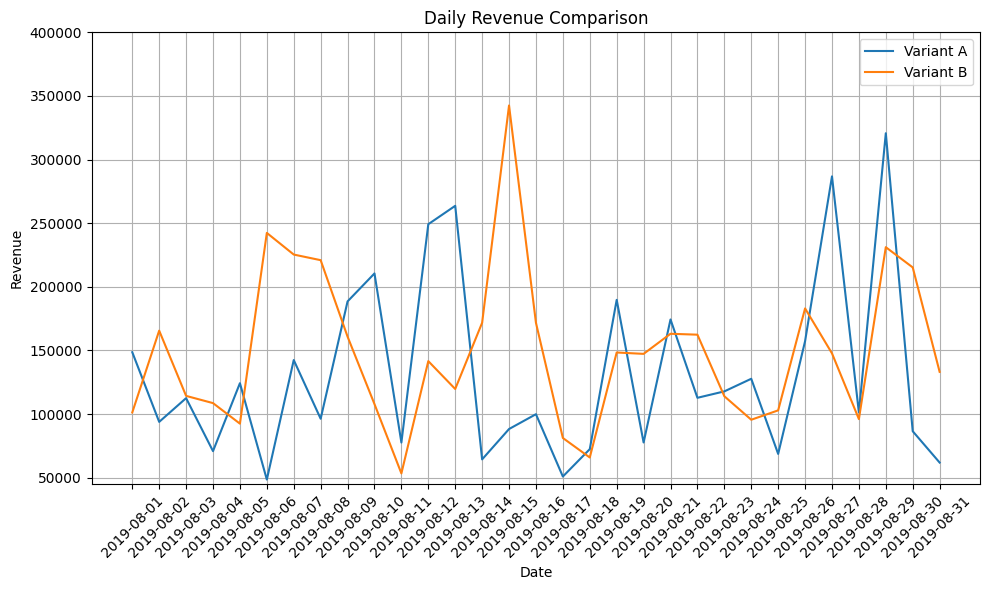

In [ ]:
#Plotting daily revenue for Variant A and Variant B to observe patterns
plt.figure(figsize=(10, 6))

plt.plot(merged_data['date'], merged_data['revenue_A'], label='Variant A')
plt.plot(merged_data['date'], merged_data['revenue_B'], label='Variant B')

plt.title('Daily Revenue Comparison')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Set the y-axis limits
plt.ylim(45000, 400000)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind
# We perform a t-test to determine whether there is a
# statistically significant difference in revenue between Variant A (without the promotional message)
# and Variant B (with the promotional message).
# Extracting  revenue for each variant.
revenue_a = merged_data['revenue_A']
revenue_b = merged_data['revenue_B']

# t-test
t_stat, p_value = ttest_ind(revenue_a, revenue_b)

print("T-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-test results:
T-statistic: -1.3165181951388558
P-value: 0.19300711465685355


In [ ]:
# Defining the significance level
alpha = 0.05

# Comparing p-value to alpha
if p_value < alpha:
    print("There is a significant difference in revenue between the two groups.")
else:
    print("There is no significant difference in revenue between the two groups.")

There is no significant difference in revenue between the two groups.
